In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
sea_lvl = pd.read_csv('epa-sea-level.csv', parse_dates = ['Year'])
sea_lvl

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648


In [2]:
sea_lvl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      135 non-null    datetime64[ns]
 1   CSIRO Adjusted Sea Level  134 non-null    float64       
 2   Lower Error Bound         134 non-null    float64       
 3   Upper Error Bound         134 non-null    float64       
 4   NOAA Adjusted Sea Level   22 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.4 KB


In [3]:
sea_lvl.drop(['Lower Error Bound', 'Upper Error Bound','NOAA Adjusted Sea Level'], inplace = True, axis = 'columns')
sea_lvl


,Year,CSIRO Adjusted Sea Level
0,1880-03-15,0.000000
1,1881-03-15,0.220472
2,1882-03-15,-0.440945
3,1883-03-15,-0.232283
4,1884-03-15,0.590551
...,...,...
130,2010-03-15,8.901575
131,2011-03-15,8.964567
132,2012-03-15,9.326772
133,2013-03-15,8.980315


In [4]:
sea_lvl.rename({'CSIRO Adjusted Sea Level': 'sea_level'}, inplace = True, axis = 'columns')
sea_lvl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       135 non-null    datetime64[ns]
 1   sea_level  134 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [5]:
sea_lvl.dropna(inplace = True)
sea_lvl

,Year,sea_level
0,1880-03-15,0.000000
1,1881-03-15,0.220472
2,1882-03-15,-0.440945
3,1883-03-15,-0.232283
4,1884-03-15,0.590551
...,...,...
129,2009-03-15,8.586614
130,2010-03-15,8.901575
131,2011-03-15,8.964567
132,2012-03-15,9.326772


In [6]:
sea_lvl['Year'] = sea_lvl['Year'].dt.year

<AxesSubplot:xlabel='Year', ylabel='sea_level'>

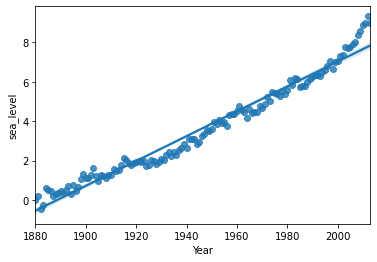

In [7]:
sns.regplot(x = 'Year',y = 'sea_level', data = sea_lvl)

In [14]:
X = sea_lvl['Year'].values.reshape(-1,1)
y = sea_lvl['sea_level'].values.reshape(-1,1)
model = LinearRegression().fit(X,y)
r_sq = model.score(X,y)
print('R Squared:')
print(r_sq)
print('Intercept:')
print(model.intercept_)
print('Slope:')
print(model.coef_)

R Squared:
0.9697466074149553
Intercept:
[-119.06594197]
Slope:
[[0.06304458]]


In [15]:
pred = model.predict([[2050]])
pred

array([[10.17545526]])